# Content 

1. Data Preperation
2. Sentence and Word Density
3. Lexical Richness
4. Parts of Speech 


# Data Preperation

In [1]:
import pandas as pd
import collections
import os
import matplotlib.pyplot as plt
from statistics import mean 

In [73]:
#create number of words dataframe
#create count dataframes

dir = "dataframes_lem_C" #"dataframes_word_H"
dir_list = os.listdir(dir)
len_dict={}

for f in dir_list:
    file_name= dir + "/" + f
    new_name="lem_new_C/"+f #"words_new_H/"
    name=f[:-4]
    df= pd.read_csv(file_name)
    len_dict[f[:-4]]=len(df)

    new_list=[]
    for i in df["index"]:
        i=str(i)
        i=i.lower()
        new_list.append(i)
    total_w = collections.Counter(new_list)
    words_df = pd.DataFrame.from_dict(total_w, orient='index').reset_index().rename(columns={0:'Count'}).sort_values(by='Count', ascending=False)
    words_df.to_csv(new_name)

#len_dict
word_len_df = pd.DataFrame.from_dict(len_dict, orient="index").reset_index()
word_len_df.to_csv("lem_len_df_C") #"word_len_df_H"

#### Create Merged Lemma Dataframe

In [245]:
#create merged dataframe of Lemmas
#create sum column and sort by sum

dir = "Human"
dir_list = os.listdir(dir)

dfs=[]

for f in dir_list:
    file_name= dir + "/" + f
    df= pd.read_csv(file_name)
    if f[0:5]=="lemma":
        if f == "lemma_df1.csv":
            first_df=df
            first_df=first_df.drop(columns=["Unnamed: 0"])
            first_df=first_df.rename(columns={"index": "Lemma", "Count":"df1"})
        else:
            df=df.drop(columns=["Unnamed: 0"])
            df=df.rename(columns={"index": "Lemma", "Count":f[5:-4]})
            first_df = pd.merge(first_df, df, on="Lemma", how="outer")

first_df['sum'] = first_df.sum(axis=1, numeric_only=True)
word_dff_H=first_df.sort_values(by='sum', ascending=False).reset_index()
word_dff_H=word_dff_H.fillna(0)
word_dff_H["Lemma"]=word_dff_H["Lemma"].astype(str)
word_dff_H.to_csv("Human/full_lem_H.csv")

In [246]:
#create merged dataframe of Lemmas
#create sum column and sort by sum

dir = "ChatGPT"
dir_list = os.listdir(dir)

dfs=[]

for f in dir_list:
    file_name= dir + "/" + f
    df= pd.read_csv(file_name)
    if f[0:5]=="lemma":

        if f == "lemma_df1.csv":
            first_df=df
            first_df=first_df.drop(columns=["Unnamed: 0"])
            first_df=first_df.rename(columns={"index": "Lemma", "Count":"df1"})
        else:
            df=df.drop(columns=["Unnamed: 0"])
            df=df.rename(columns={"index": "Lemma", "Count":f[5:-4]})
            first_df = pd.merge(first_df, df, on="Lemma", how="outer")

first_df['sum'] = first_df.sum(axis=1, numeric_only=True)
word_dff_H=first_df.sort_values(by='sum', ascending=False).reset_index()
word_dff_H=word_dff_H.fillna(0)
word_dff_H["Lemma"]=word_dff_H["Lemma"].astype(str)
word_dff_H.to_csv("ChatGPT/full_lem_C.csv")

In [ ]:
#create merged dataframe of words
#create sum column and sort by sum

dir = "words_new_C"
dir_list = os.listdir(dir)

dfs=[]

for f in dir_list:
    file_name= dir + "/" + f
    df= pd.read_csv(file_name)
    if f == "word_df1.csv":
        first_df=df
        first_df=first_df.drop(columns=["Unnamed: 0"])
        first_df=first_df.rename(columns={"index": "Words", "Count":"df1"})
    else:
        df=df.drop(columns=["Unnamed: 0"])
        df=df.rename(columns={"index": "Words", "Count":f[5:-4]})
        first_df = pd.merge(first_df, df, on="Words", how="outer")

first_df['sum'] = first_df.sum(axis=1, numeric_only=True)
word_dff_C=first_df.sort_values(by='sum', ascending=False).reset_index()
word_dff_H=word_dff_H.fillna(0)
word_dff_H["Words"]=word_dff_H["Words"]
word_dff_C["Words"]=word_dff_C["Words"].astype(str)
word_dff_C.to_csv("full_words_C")

#### Create Merged PoS Dataframe

In [247]:
#create merged dataframe of PoS
#create sum column and sort by sum

dir = "Human"
dir_list = os.listdir(dir)

for f in dir_list:
    file_name= dir + "/" + f
    df= pd.read_csv(file_name)
    if f[0:3]=="pos":
        if f == "pos_df1.csv":
            first_df=df
            first_df=first_df.drop(columns=["Unnamed: 0"])
            first_df=first_df.rename(columns={"index": "PoS", "Count":"df1"})
        else:
            df=df.drop(columns=["Unnamed: 0"])
            df=df.rename(columns={"index": "PoS", "Count":f[4:-4]})
            first_df = pd.merge(first_df, df, on="PoS", how="outer")

first_df['sum'] = first_df.sum(axis=1, numeric_only=True)
pos_dff_H=first_df.sort_values(by='sum', ascending=False).reset_index()
pos_dff_H=pos_dff_H.drop(columns=['index'])
pos_dff_H["avg"]=pos_dff_H["sum"]/109
pos_dff_H.to_csv("Human/full_pos_H.csv")

In [248]:
#create merged dataframe of words
#create sum column and sort by sum

dir = "ChatGPT"
dir_list = os.listdir(dir)

for f in dir_list:
    file_name= dir + "/" + f
    df= pd.read_csv(file_name)
    if f[0:3]=="pos":
        if f == "pos_df1.csv":
            first_df=df
            first_df=first_df.drop(columns=["Unnamed: 0"])
            first_df=first_df.rename(columns={"index": "PoS", "Count":"df1"})
        else:
            df=df.drop(columns=["Unnamed: 0"])
            df=df.rename(columns={"index": "PoS", "Count":f[5:-4]})
            first_df = pd.merge(first_df, df, on="PoS", how="outer")


first_df['sum'] = first_df.sum(axis=1, numeric_only=True)
pos_dff_C=first_df.sort_values(by='sum', ascending=False).reset_index()
pos_dff_C=pos_dff_C.drop(columns=['index'])
pos_dff_C["avg"]=pos_dff_C["sum"]/109
pos_dff_C.to_csv("ChatGPT/full_pos_C.csv")

# Sentence and Word Density

#### Average Number of Words in Text

In [2]:
sent_H=pd.read_csv("sent_H.csv")
sent_H=sent_H.drop(sent_H.index[range(1834,1977)])
sent_H_no_null = sent_H.loc[sent_H["Word Count"]>=1]
sent_H_no_null=sent_H_no_null.drop(columns=["Unnamed: 0"]).reset_index(drop=True)

sent_C=pd.read_csv("sent_C.csv")
sent_C_no_null = sent_C.loc[sent_C["Word Count"]>=1]
sent_C_no_null=sent_C_no_null.drop(columns=["Unnamed: 0"]).reset_index(drop=True)

print("Average Number of Words Human Corpus: ", sum(sent_H_no_null["Word Count"])/109)
print("Total Number of Words Human Corpus: ", sum(sent_H_no_null["Word Count"]))
print("Average Number of Words ChatGPT Corpus: ", sum(sent_C_no_null["Word Count"])/109)
print("Total Number of Words ChatGPT Corpus: ", sum(sent_C_no_null["Word Count"]))

Average Number of Words Human Corpus:  1038.2568807339449
Total Number of Words Human Corpus:  113170
Average Number of Words ChatGPT Corpus:  1249.7706422018348
Total Number of Words ChatGPT Corpus:  136225


In [220]:
words_per_text_H=[]
for i in sent_H_no_null["Text"]:
    text=sent_H_no_null.loc[sent_H_no_null["Text"]==i]
    words_per_text_H.append(text["Word Count"].sum())

words_per_text_C=[]
for i in sent_C_no_null["Text"]:
    text=sent_C_no_null.loc[sent_C_no_null["Text"]==i]
    words_per_text_C.append(text["Word Count"].sum())

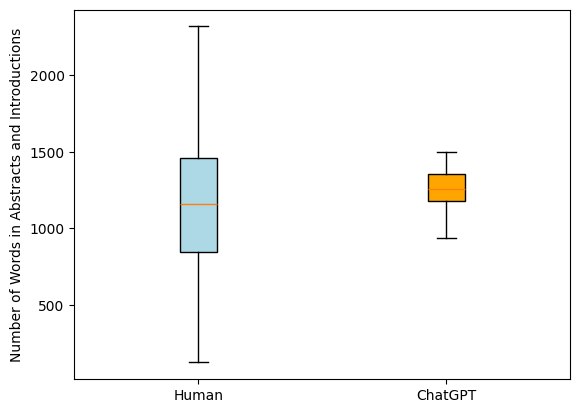

In [221]:
avg_ls=[ words_per_text_H, words_per_text_C ]

fig, ax = plt.subplots()
ax.set_ylabel('Number of Words in Abstracts and Introductions')

labels = ['Human', 'ChatGPT']
colors = ['lightblue', 'orange']

bplot = ax.boxplot(avg_ls,
                   patch_artist=True,  
                   tick_labels=labels)  

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig("images/number_of_words.jpg", bbox_inches="tight")
plt.show()

In [226]:
words_per_text_H.sort()
words_per_text_H[-1]

2318

#### Average Number of Sentences in Text

In [229]:
print("Total Number of Sentences Human: " , len(sent_H_no_null))
print("Average Number of Sentences Human: " , len(sent_H_no_null)/109)
print("Total Number of Sentences ChatGPT: " , len(sent_C_no_null))
print("Average Number of Sentences ChatGPT: " , len(sent_C_no_null)/109)

Total Number of Sentences Human:  4472
Average Number of Sentences Human:  41.027522935779814
Total Number of Sentences ChatGPT:  7719
Average Number of Sentences ChatGPT:  70.81651376146789


In [202]:
long=sent_H_no_null.loc[sent_H_no_null["Word Count"]>100]
long

,Sentence Text,Sentence Count,Word Count,Text
2804,"['Natural', 'regeneration', 'has', 'been', 'st...",31,102,scientific_text61
3098,"['Although', 'many', 'mutations', 'associated'...",29,193,scientific_text68
3134,"['These', 'include', 'mutations', 'in', 'the',...",21,144,scientific_text69


In [157]:
print(long.loc[2804, "Sentence Text"])

['Natural', 'regeneration', 'has', 'been', 'studied', 'in', 'a', 'range', 'of', 'environments', 'including', 'degraded', 'lowland', 'tropical', 'pasture', 'Parrotta', 'et', 'al', '.', '1997', 'tropical', 'mountain', 'forests', 'Holl', 'et', 'al', '.', '2000', 'boreal', 'forest', 'Peltzer', 'et', 'al', '.', '2000', 'Holgén', 'and', 'Hånell', '2000', 'Hanssen', '2003', 'Man', 'et', 'al', '.', '2008', 'Man', 'et', 'al', '.', '2009', 'lowland', 'European', 'forests', 'Madsen', 'and', 'Larsen', '1997', 'Emborg', '1998', 'Olesen', 'and', 'Madsen', '2008', 'Modrý', 'et', 'al', '.', '2004', 'Swagrzyk', 'et', 'al', '.', '2001', 'Harmer', 'and', 'Morgan', '2009', 'Wagner', 'et', 'al', '.', '2010', 'Smit', 'et', 'al', '.', '2012', 'and', 'European', 'mountain', 'forests', 'Jonásová', 'et', 'al', '.', '2010', 'Bace', 'et', 'al', '.', '2012']


In [227]:
long=sent_C_no_null.loc[sent_C_no_null["Word Count"]>100]
long

,Sentence Text,Sentence Count,Word Count,Text
2473,"['Our', 'specific', 'objectives', 'are', 'to',...",63,113,text3.txt
4742,"['The', 'results', 'section', 'will', 'present...",113,122,text58.txt
5207,"['The', 'results', 'section', 'will', 'present...",106,125,text63.txt
5725,"['The', 'scope', 'includes', '*', 'Mathematica...",26,101,text70.txt


In [228]:
print(long.loc[4742, "Sentence Text"])

['The', 'results', 'section', 'will', 'present', '*', 'SOC', 'Levels', 'Data', 'on', 'SOC', 'levels', 'in', 'different', 'CAFS', 'and', 'monoculture', 'coffee', 'systems', 'highlighting', 'differences', 'across', 'various', 'regions', 'and', 'management', 'practices', 'Carbon', 'Sequestration', 'Rates', 'Estimates', 'of', 'carbon', 'sequestration', 'rates', 'showing', 'how', 'different', 'factors', 'such', 'as', 'tree', 'species', 'and', 'density', 'influence', 'these', 'rates', 'Comparative', 'Analysis', 'Comparative', 'analysis', 'of', 'SOC', 'levels', 'and', 'carbon', 'sequestration', 'rates', 'between', 'CAFS', 'and', 'monoculture', 'systems', 'identifying', 'key', 'factors', 'that', 'enhance', 'carbon', 'sequestration', 'Management', 'Practices', 'Discussion', 'of', 'how', 'specific', 'management', 'practices', 'impact', 'SOC', 'and', 'carbon', 'sequestration', 'providing', 'practical', 'insights', 'for', 'optimizing', 'CAFS', 'The', 'discussion', 'will', 'interpret', 'these', 're

#### Average number of Words per Sentence

In [239]:
print("Average Number of words per sentence Human: " , sent_H_no_null["Word Count"].mean())
print("Average Number of words per sentence ChatGPT: " , sent_C_no_null["Word Count"].mean())

Average Number of words per sentence Human:  25.306350626118068
Average Number of words per sentence ChatGPT:  17.64801140044047


In [241]:
sent_H_no_one = sent_H_no_null.loc[sent_H_no_null["Word Count"]>=2]
print(sent_H_no_one["Word Count"].mean())
sent_C_no_one = sent_C_no_null.loc[sent_C_no_null["Word Count"]>=2]
print(sent_C_no_one["Word Count"].mean())

26.563969896519286
21.537957487613873


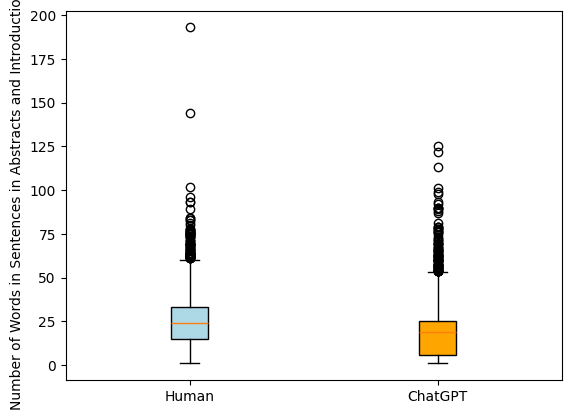

In [242]:
avg_ls= [sent_H_no_null["Word Count"].to_list(), sent_C_no_null["Word Count"].to_list()]

fig, ax = plt.subplots()
ax.set_ylabel('Number of Words in Sentences in Abstracts and Introductions')

labels = ['Human', 'ChatGPT']
colors = ['lightblue', 'orange']

bplot = ax.boxplot(avg_ls,
                   patch_artist=True,  
                   tick_labels=labels)  

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig("images/number_of_words_per_sentence.jpg", bbox_inches="tight")
plt.show()

In [208]:
ls_H.sort()
ls_H[0]

1

In [113]:
ls_C.sort()
ls_C[-1]

125

# Lexical Richness

#### Number of Unique Lemmas

In [249]:
words_H=pd.read_csv("Human/full_lem_H.csv")
H=words_H[["Lemma","sum"]]
words_C=pd.read_csv("ChatGPT/full_lem_C.csv")
C=words_C[["Lemma","sum"]]

print("Number of unique Lemmas Human: " , len(H))
print("Number of unique Lemmas ChatGPT: ", len(C))

Number of unique Lemmas Human:  10114
Number of unique Lemmas ChatGPT:  5420


In [250]:
dir = "Human"
dir_list = os.listdir(dir)

lens_H=[]

for f in dir_list:
    if f[0:5]=="lemma":
        file_name= dir + "/" + f
        df= pd.read_csv(file_name)
        lens_H.append(len(df))

dir = "ChatGPT"
dir_list = os.listdir(dir)

lens_C=[]

for f in dir_list:
    if f[0:5]=="lemma":
        file_name= dir + "/" + f
        df= pd.read_csv(file_name)
        lens_C.append(len(df))

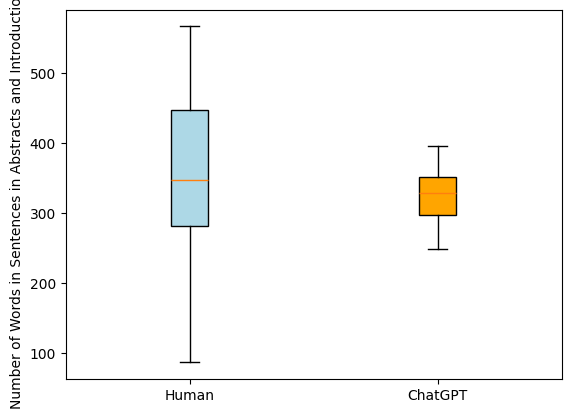

In [252]:
lens_H.sort()
avg_ls= [lens_H[:-1], lens_C]

fig, ax = plt.subplots()
ax.set_ylabel('Number of Words in Sentences in Abstracts and Introductions')

labels = ['Human', 'ChatGPT']
colors = ['lightblue', 'orange']

bplot = ax.boxplot(avg_ls,
                   patch_artist=True,  
                   tick_labels=labels)  

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig("images/number_of_lemmas_per_text.jpg", bbox_inches="tight")
plt.show()

In [251]:
lens_H.sort()
print(lens_H[-2])
print(lens_H[1])
print(mean(lens_H))

lens_C.sort()
print(lens_C[-1])
print(lens_C[1])
print(mean(lens_C))

566
111
358
355.22935779816515
396
252
329
324.35779816513764


#### Frequently used Lemmas

In [43]:
H=pd.read_csv("Human/full_lem_H.csv")
H=H[["Lemma", "sum"]]
C=pd.read_csv("ChatGPT/full_lem_C.csv")
C=C[["Lemma", "sum"]]

all_words = pd.merge(H, C, on="Lemma", how="outer")
all_words=all_words.rename(columns={"sum_x": "Human", "sum_y":"ChatGPT"})
all_words=all_words.sort_values(by='ChatGPT', ascending=False).reset_index()
all_words=all_words.drop(columns=["index"])
all_words["norm_H"]=(all_words["Human"]/113170)*100
all_words["norm_C"]=(all_words["ChatGPT"]/136225)*100

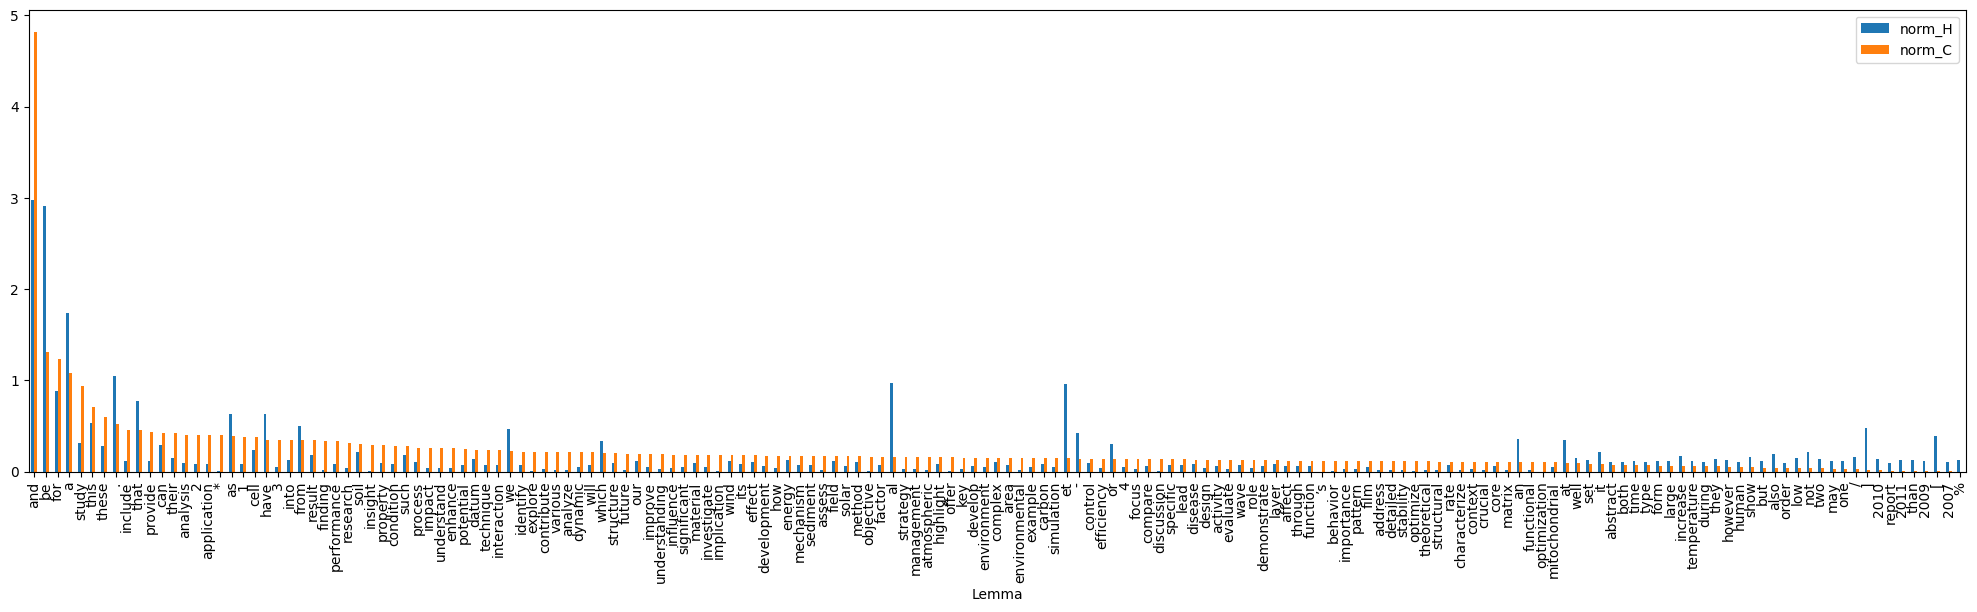

In [44]:
all_words=all_words.fillna(0)
all_words["Difference"]=abs(all_words["norm_H"]-all_words["norm_C"])
all_words_no_null = all_words.loc[(all_words["norm_H"] > 0.1) | (all_words["norm_C"] > 0.1)] 

diff_words= all_words_no_null.loc[(all_words_no_null["Difference"]> all_words_no_null["norm_H"]/3) | (all_words_no_null["Difference"]> all_words_no_null["norm_C"]/3)]

plot_df=diff_words
plot_df=plot_df.set_index('Lemma')
plot_df=plot_df.drop(columns=["Difference", "Human", "ChatGPT"])
#plot_df=plot_df[1:]

plot_df.plot(figsize=(25, 6), kind="bar")


plt.xticks(rotation='vertical')
plt.savefig('images/frequ_lemmas.jpg', bbox_inches="tight")
plt.show()
#logarithmische Skala

In [45]:
plot_df

,norm_H,norm_C
Lemma,,
and,2.978705,4.821435
be,2.911549,1.308864
for,0.884510,1.230317
a,1.740744,1.085704
study,0.311036,0.940356
...,...,...
than,0.129009,0.009543
2009,0.121940,0.007341
[,0.394981,0.005873


#### Frequently used Words

In [46]:
H=pd.read_csv("Human/full_lem_H.csv")
H=H[["Lemma", "sum"]]

vocab=["pivotal", "crucial", "effectively", "additionally", "comprehensive", "enhance", "capability", "valuable", "intricate", "realm", "showcase", "delve", "tapestry"]
sums=[]

df=pd.DataFrame(columns=["Lemma", "Human",  "ChatGPT"])
count=0

for i, row in H.iterrows():
    for word in vocab:
        if word==H.loc[i,"Lemma"]:
            df.loc[count, "Lemma"]= H.loc[i,"Lemma"]
            df.loc[count, "Human"]= (H.loc[i,"sum"]/113170)*100
            df.loc[count, "ChatGPT"]= 0
            count+=1      

In [47]:
C=pd.read_csv("ChatGPT/full_lem_C.csv")
C=C[["Lemma", "sum"]]


for i, row in C.iterrows():
    for word in vocab:
        if word==C.loc[i,"Lemma"]:
            if C.loc[i,"Lemma"] in df["Lemma"].to_list():
                row=df.loc[df["Lemma"] == C.loc[i,"Lemma"]].index
                df.loc[row, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100

            else:
                df.loc[count, "Lemma"]= C.loc[i,"Lemma"]
                df.loc[count, "Human"]= 0
                df.loc[count, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100
            count+=1

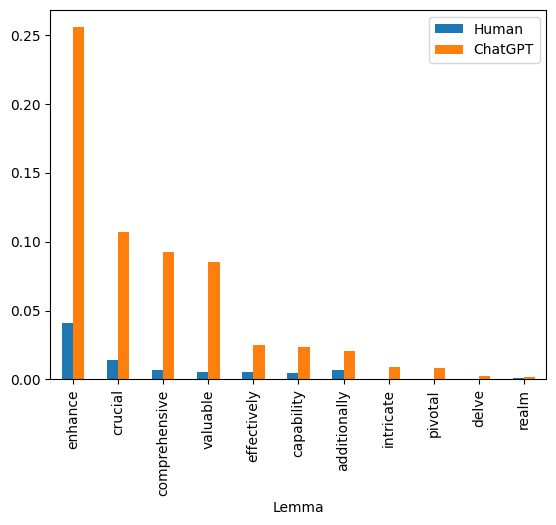

In [48]:
df=df.sort_values(by='ChatGPT', ascending=False)
df.plot(kind="bar", x="Lemma")

plt.savefig('images/specific_words.jpg', bbox_inches="tight")
plt.show()

#### Hedges

In [16]:
H=pd.read_csv("Human/full_lem_H.csv")
H=H[["Lemma", "sum"]]

hedges=["may", "would", "suggest", "consider", "possible", "indicate", "theory", "might", "rather"]

df=pd.DataFrame(columns=["Lemma", "Human", "ChatGPT"])
count=0

for i, row in H.iterrows():
    for word in hedges:
        if word==H.loc[i,"Lemma"]:
            df.loc[count, "Lemma"]= H.loc[i,"Lemma"]
            df.loc[count, "Human"]= (H.loc[i,"sum"]/113170)*100
            df.loc[count, "ChatGPT"]= 0
            count+=1 

In [17]:
C=pd.read_csv("ChatGPT/full_lem_C.csv")
C=C[["Lemma", "sum"]]

hedges=["may", "would", "suggest", "consider", "possible", "indicate", "theory", "might", "rather"]

for i, row in C.iterrows():
    for word in hedges:
        if word==C.loc[i,"Lemma"]:
            if C.loc[i,"Lemma"] in df["Lemma"].to_list():
                row=df.loc[df["Lemma"] == C.loc[i,"Lemma"]].index
                df.loc[row, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100

            else:
                df.loc[count, "Lemma"]= C.loc[i,"Lemma"]
                df.loc[count, "Human"]= 0
                df.loc[count, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100
            count+=1

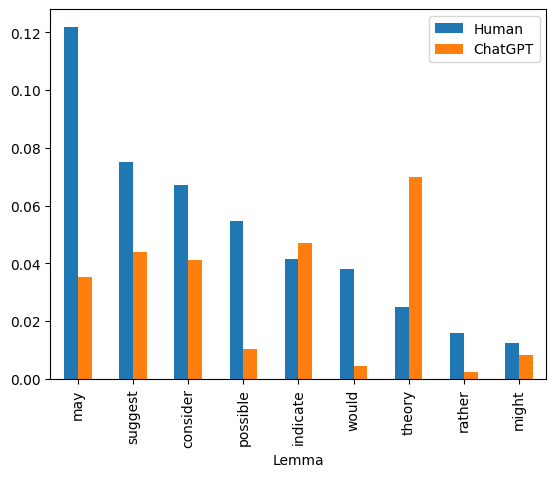

0.26206643420811154 0.4515330918087832


In [18]:
df=df.sort_values(by='Human', ascending=False)
df.plot(kind="bar", x="Lemma")

plt.savefig('images/hedges.jpg', bbox_inches="tight")
plt.show()
print(sum(df["ChatGPT"]), sum(df["Human"]))

#### Boosters

In [19]:
H=pd.read_csv("Human/full_lem_H.csv")
H=H[["Lemma", "sum"]]

boosters=["will", "truth", "evidence", "show", "determine", "finding", "fact", "demonstration", "reveal", "always"]
df=pd.DataFrame(columns=["Lemma", "Human", "ChatGPT"])
count=0

for i, row in H.iterrows():
    for word in boosters:
        if word==H.loc[i,"Lemma"]:
            df.loc[count, "Lemma"]= H.loc[i,"Lemma"]
            df.loc[count, "Human"]= (H.loc[i,"sum"]/113170)*100
            df.loc[count, "ChatGPT"]= 0
            count+=1       

In [20]:
C=pd.read_csv("ChatGPT/full_lem_C.csv")
C=C[["Lemma", "sum"]]

boosters=["will", "truth", "evidence", "show", "determine", "finding", "fact", "demonstration", "reveal", "always"]
sums=[]

for i, row in C.iterrows():
    for word in boosters:
        if word==C.loc[i,"Lemma"]:
            if C.loc[i,"Lemma"] in df["Lemma"].to_list():
                row=df.loc[df["Lemma"] == C.loc[i,"Lemma"]].index
                df.loc[row, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100

            else:
                df.loc[count, "Lemma"]= C.loc[i,"Lemma"]
                df.loc[count, "Human"]= 0
                df.loc[count, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100
            count+=1      

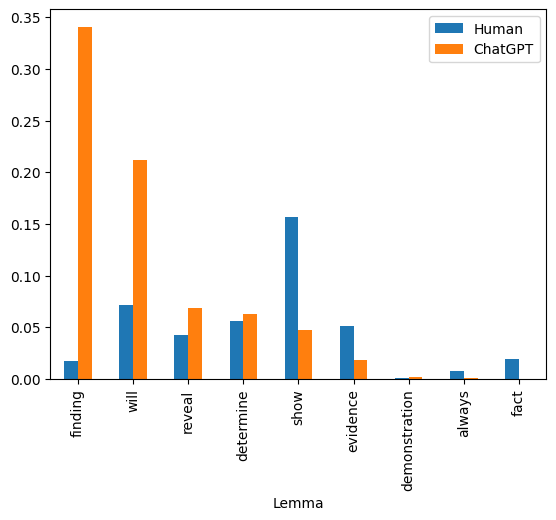

0.7524316388328132 0.42414067332331895


In [21]:
df=df.sort_values(by='ChatGPT', ascending=False)
df.plot(kind="bar", x="Lemma")

plt.savefig('images/boosters.jpg', bbox_inches="tight")
plt.show()
print(sum(df["ChatGPT"]), sum(df["Human"]))

# Parts of Speech

#### PoS General

In [22]:
pos_H=pd.read_csv("Human/full_pos_H.csv")
H=pos_H[["PoS","sum", "avg"]]
pos_C=pd.read_csv("ChatGPT/full_pos_C.csv")
C=pos_C[["PoS","sum", "avg"]]

all_pos = pd.merge(H, C, on="PoS", how="outer")
all_pos=all_pos.rename(columns={"sum_x": "Sum Human", "sum_y":"Sum ChatGPT", "avg_x": "Average Human" , "avg_y": "Average ChatGPT"})
all_pos["norm_pos_H"]=(all_pos["Sum Human"]/113170)*100
all_pos["norm_pos_C"]=(all_pos["Sum ChatGPT"]/136225)*100
all_pos=all_pos.sort_values(by='Sum Human', ascending=False).reset_index()
all_pos=all_pos.drop(columns=["index"])
all_pos=all_pos.fillna(0)
all_pos_no_punct=all_pos.drop(1)

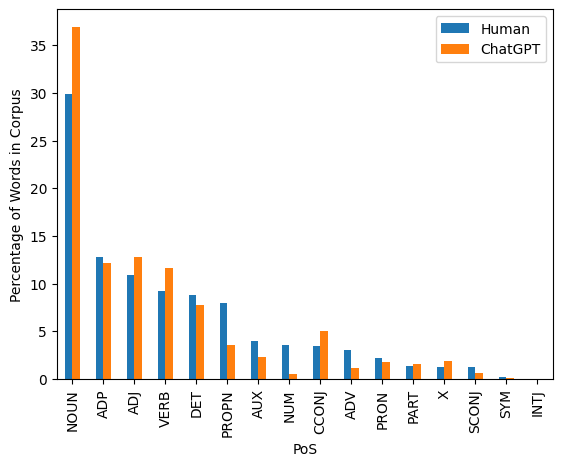

In [23]:
plot_df=all_pos_no_punct
plot_df=plot_df.drop(columns=["Sum Human", "Sum ChatGPT", "Average Human", "Average ChatGPT"])
plot_df=plot_df.rename(columns={"norm_pos_H": "Human", "norm_pos_C":"ChatGPT"})
plot_df=plot_df.set_index('PoS')
plot_df.plot(kind="bar", ylabel='Percentage of Words in Corpus')

plt.savefig('images/PoS.jpg', bbox_inches="tight")
plt.show()

In [24]:
plot_df

,Human,ChatGPT
PoS,,
NOUN,29.876292,36.908057
ADP,12.760449,12.212149
ADJ,10.889812,12.785465
VERB,9.236547,11.625619
DET,8.848635,7.810607
PROPN,7.954405,3.603597
AUX,4.001060,2.365939
NUM,3.551295,0.493302
CCONJ,3.495626,5.071022


#### Punctuation

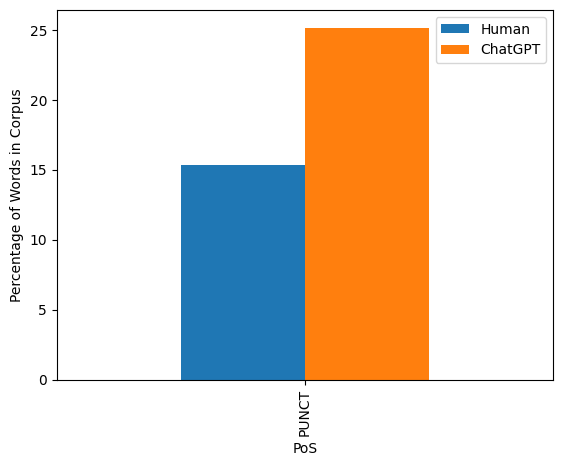

In [25]:
plot_df=all_pos[1:2]
plot_df=plot_df.drop(columns=["Sum Human", "Sum ChatGPT", "Average Human", "Average ChatGPT"])
plot_df=plot_df.rename(columns={"norm_pos_H": "Human", "norm_pos_C":"ChatGPT"})
plot_df=plot_df.set_index('PoS')
plot_df.plot(kind="bar", ylabel='Percentage of Words in Corpus')

plt.savefig('images/PoS_punct.jpg', bbox_inches="tight")
plt.show()

#### Nouns vs. Verbs

In [26]:
n_v = all_pos_no_punct.loc[[0,4]]

H_total=n_v.loc[0,"Sum Human"]+n_v.loc[4, "Sum Human"]
C_total=n_v.loc[0,"Sum ChatGPT"]+n_v.loc[4, "Sum ChatGPT"]
H_N= n_v.loc[0,"Sum Human"]/H_total
H_V= n_v.loc[4,"Sum Human"]/H_total
C_N= n_v.loc[0,"Sum ChatGPT"]/C_total
C_V= n_v.loc[4,"Sum ChatGPT"]/C_total

dct={}

dct["Noun"]=(H_N, C_N)
dct["Verb"]=(H_V, C_V)

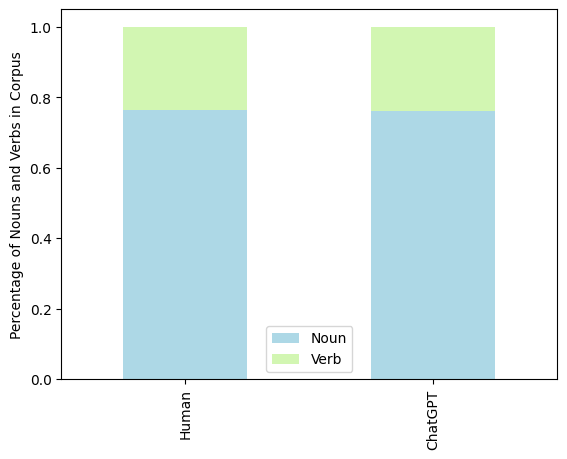

In [27]:
plot_df=pd.DataFrame.from_dict(dct)

plot_df.rename(index={0:'Human', 1:"ChatGPT"}, inplace=True)
plot_df.plot(kind="bar", stacked=True, ylabel='Percentage of Nouns and Verbs in Corpus', color=["lightblue", "#d2f6b2"])

plt.savefig('images/nouns_verbs.jpg', bbox_inches="tight")
plt.show()

#### Adjectives

In [34]:
print("Percentage of adjectives Human: ", all_pos_no_punct.loc[3, "norm_pos_H"])
print("Percentage of adjectives ChatGPT: ",all_pos_no_punct.loc[3, "norm_pos_C"])

Percentage of adjectives Human:  10.889811787576214
Percentage of adjectives ChatGPT:  12.785465222976693


In [38]:
H=pd.read_csv("Human/full_lem_H.csv")
H=H[["Lemma", "sum"]]

adjectives=["tolerated", "meaningful", "efficacious", "consistent", "mild", "good", "severe", 
          "comparable", "similar", "significant", "feasible", "serious", "inadequate", "acceptable", 
          "relevant", "moderate", "safe"]

df=pd.DataFrame(columns=["Lemma", "Human", "ChatGPT"])
count=0

for i, row in H.iterrows():
    for word in adjectives:
        if word==H.loc[i,"Lemma"]:
            df.loc[count, "Lemma"]= H.loc[i,"Lemma"]
            df.loc[count, "Human"]= (H.loc[i,"sum"]/113170)*100
            df.loc[count, "ChatGPT"]= 0
            count+=1        

In [39]:
C=pd.read_csv("ChatGPT/full_lem_C.csv")
C=C[["Lemma", "sum"]]

for i, row in C.iterrows():
    for word in adjectives:
        if word==C.loc[i,"Lemma"]:
            if C.loc[i,"Lemma"] in df["Lemma"].to_list():
                row=df.loc[df["Lemma"] == C.loc[i,"Lemma"]].index
                df.loc[row, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100

            else:
                df.loc[count, "Lemma"]= C.loc[i,"Lemma"]
                df.loc[count, "Human"]= 0
                df.loc[count, "ChatGPT"]= (C.loc[i,"sum"]/136225)*100
            count+=1      

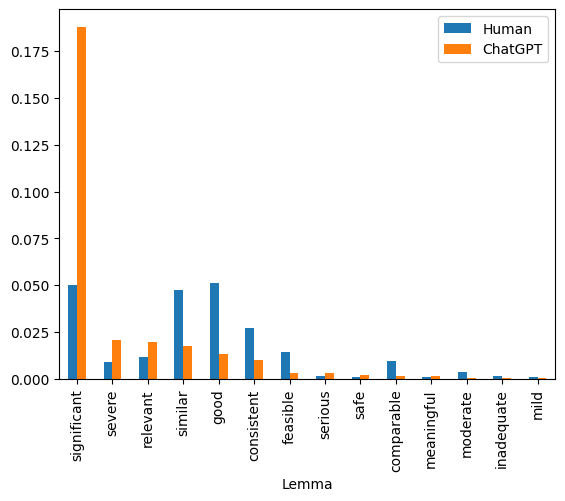

In [40]:
df=df.sort_values(by='ChatGPT', ascending=False)
df.plot(kind="bar", x="Lemma")

plt.savefig('images/industr_adjectives.jpg', bbox_inches="tight")
plt.show()

In [41]:
df

,Lemma,Human,ChatGPT
1,significant,0.050367,0.187924
7,severe,0.008836,0.020554
5,relevant,0.011487,0.01982
2,similar,0.047716,0.017618
0,good,0.05125,0.013213
3,consistent,0.027392,0.010277
4,feasible,0.014138,0.002936
10,serious,0.001767,0.002936
12,safe,0.000884,0.002202
6,comparable,0.00972,0.001468
